In [1]:
import numpy as np
from numpy import exp,sqrt as exp,sqrt
import pandas as pd
import math
import pylab
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("NVDA.csv",parse_dates=["Date"])
data=data.drop(["Open","High","Low","Adj Close","Volume"],axis=1)
print(data)
data["Close"]=data["Close"].astype("float")
x=np.log(data["Close"]/data["Close"].shift(1))[1:]
x

          Date       Close
0   2020-11-11  134.179993
1   2020-11-12  134.567505
2   2020-11-13  132.970001
3   2020-11-16  135.152496
4   2020-11-17  134.222504
..         ...         ...
247 2021-11-04  298.010010
248 2021-11-05  297.519989
249 2021-11-08  308.040009
250 2021-11-09  306.570007
251 2021-11-10  294.589996

[252 rows x 2 columns]


1      0.002884
2     -0.011942
3      0.016280
4     -0.006905
5      0.000484
         ...   
247    0.113706
248   -0.001646
249    0.034748
250   -0.004784
251   -0.039862
Name: Close, Length: 251, dtype: float64

In [3]:
x.describe()

count    251.000000
mean       0.003133
std        0.024808
min       -0.085752
25%       -0.010729
50%        0.003055
75%        0.017040
max        0.113706
Name: Close, dtype: float64

<AxesSubplot:>

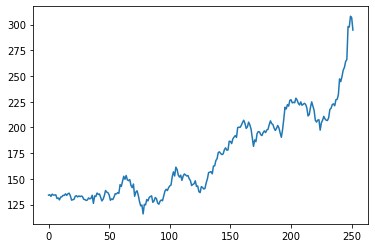

In [4]:
data['Close'].plot()

<AxesSubplot:>

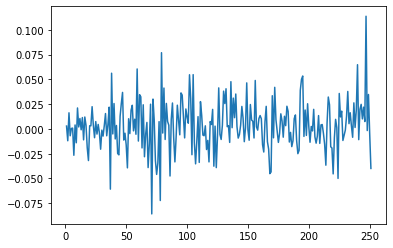

In [5]:
x.plot()

In [6]:
dt=1/252
mu=x.mean()
s=np.var(x)
sigma=s/dt

In [7]:
mu

0.003133077352896035

In [8]:
sigma

0.15447043882206632

<AxesSubplot:>

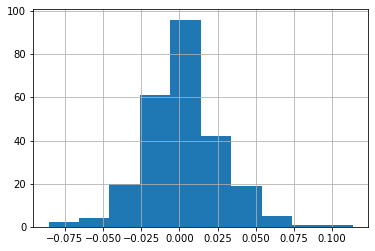

In [9]:
x.hist()

In [10]:
stats.kstest(x, 'norm')

KstestResult(statistic=0.468141316124727, pvalue=5.959268582207219e-51)

In [11]:
stats.shapiro(x)

ShapiroResult(statistic=0.9773597717285156, pvalue=0.0004919441998936236)

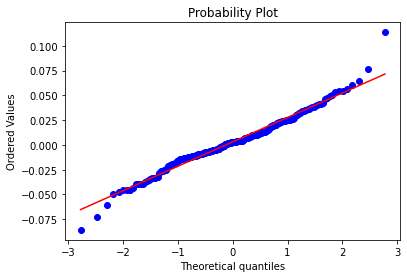

In [12]:
stats.probplot(x,dist='norm',plot=pylab)
plt.show()

In [13]:
r=mu+sigma*sigma/2

In [14]:
r

0.015063635587836901

In [15]:
def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * stats.norm.cdf(d1) - K * np.exp(-r*T)* stats.norm.cdf(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*stats.norm.cdf(-d2) - S*stats.norm.cdf(-d1)

In [16]:
S=float(data['Close'].tail(1))
S

294.589996

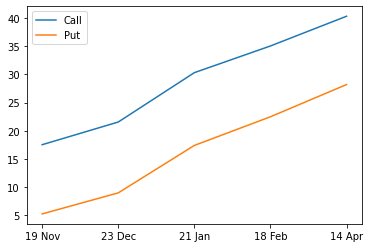

In [17]:
call_theor=[('19 Nov', 17.53),
 ('23 Dec', 21.55),
 ('21 Jan', 30.30),
 ('18 Feb', 35.03),
 ('14 Apr', 40.30)]
put_theor=[('19 Nov', 5.26),
 ('23 Dec', 8.99),
 ('21 Jan', 17.40),
 ('18 Feb', 22.48),
 ('14 Apr', 28.19)]
plt.plot(*zip(*call_theor),label='Call')
plt.plot(*zip(*put_theor),label='Put')
plt.legend()
plt.show()

In [18]:
call_list=[]
put_list=[]

### 19 Nov

In [19]:
call_list.append(("19 Nov",BS_CALL(S,280,9/252 ,r,sigma)))

In [20]:
put_list.append(("19 Nov",BS_PUT(S,280,9/252 ,r,sigma)))

### 23 Dec

In [21]:
call_list.append(("23 Dec",BS_CALL(S,280,31/252 ,r,sigma)))

In [22]:
put_list.append(("23 Dec",BS_PUT(S,280,31/252 ,r,sigma)))

### 21 Jan

In [23]:
call_list.append(("21 Jan",BS_CALL(S,280,52/252 ,r,sigma)))

In [24]:
put_list.append(("21 Jan",BS_PUT(S,280,52/252 ,r,sigma)))

### 18 Feb

In [25]:
call_list.append(("18 Feb",BS_CALL(S,280,72/252 ,r,sigma)))

In [26]:
put_list.append(("18 Feb",BS_PUT(S,280,72/252 ,r,sigma)))

### 14 Apr

In [27]:
call_list.append(("14 Apr",BS_CALL(S,280,111/252 ,r,sigma)))

In [28]:
put_list.append(("14 Apr",BS_PUT(S,280,111/252 ,r,sigma)))

## Plot

In [29]:
call_list

[('19 Nov', 14.873335615062217),
 ('23 Dec', 16.47444312637259),
 ('21 Jan', 18.015393709595003),
 ('18 Feb', 19.362832463828624),
 ('14 Apr', 21.71620297382455)]

In [30]:
put_list

[('19 Nov', 0.13274377211785904),
 ('23 Dec', 1.3660690100767425),
 ('21 Jan', 2.5564055939406174),
 ('18 Feb', 3.570335193147727),
 ('14 Apr', 5.274508547684107)]

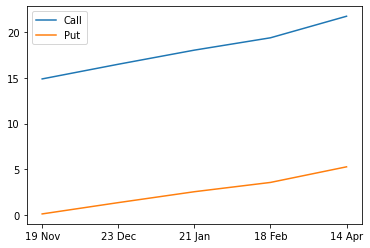

In [31]:
plt.plot(*zip(*call_list),label='Call')
plt.plot(*zip(*put_list),label='Put')
plt.legend()
plt.show()

# Greeks

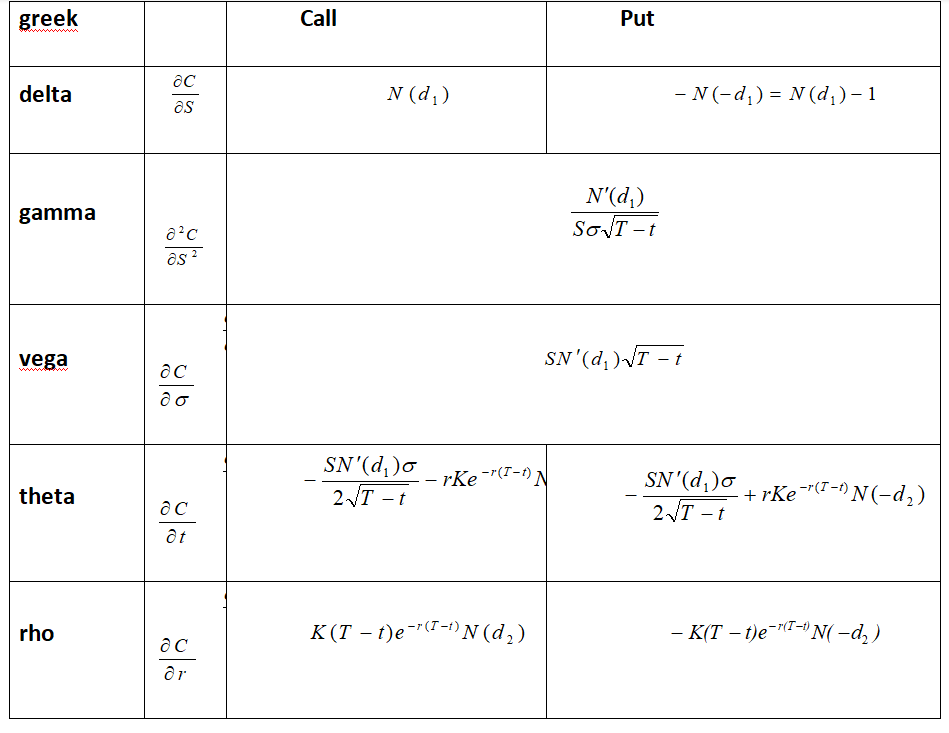

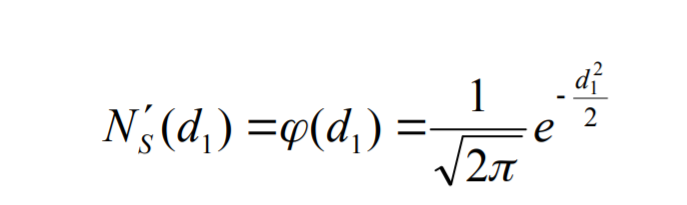

In [32]:
def delta(type,S,K,T,r,sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    if type=='C':
        return stats.norm.cdf(d1)
    return stats.norm.cdf(d1)-1

In [33]:
print('19 Nov')
print('Call '+str(delta('C',S,280,9/252 ,r,sigma)))
print('Put '+str(delta('P',S,280,9/252 ,r,sigma)))
print()
print('23 Dec')
print('Call '+str(delta('C',S,280,31/252 ,r,sigma)))
print('Put '+str(delta('P',S,280,31/252 ,r,sigma)))
print()
print('21 Jan')
print('Call '+str(delta('C',S,280,52/252 ,r,sigma)))
print('Put '+str(delta('P',S,280,52/252 ,r,sigma)))
print()
print('18 Feb')
print('Call '+str(delta('C',S,280,72/252 ,r,sigma)))
print('Put '+str(delta('P',S,280,72/252 ,r,sigma)))
print()
print('14 Apr')
print('Call '+str(delta('C',S,280,111/252 ,r,sigma)))
print('Put '+str(delta('P',S,280,111/252 ,r,sigma)))

19 Nov
Call 0.9618893504369028
Put -0.038110649563097176

23 Dec
Call 0.8410644823393447
Put -0.15893551766065528

21 Jan
Call 0.7890919965683953
Put -0.21090800343160465

18 Feb
Call 0.760713403297079
Put -0.23928659670292096

14 Apr
Call 0.7295481006302418
Put -0.2704518993697582


In [34]:
def gamma(S,K,T,r,sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K*np.exp(-r*T)/S/S/sigma/math.sqrt(2*math.pi*T)*np.exp(-d2*d2/2)

In [35]:
print('19 Nov')
print(gamma(S,280,9/252 ,r,sigma))
print()
print('23 Dec')
print(gamma(S,280,31/252 ,r,sigma))
print()
print('21 Jan')
print(gamma(S,280,52/252 ,r,sigma))
print()
print('18 Feb')
print(gamma(S,280,72/252 ,r,sigma))
print()
print('14 Apr')
print(gamma(S,280,111/252 ,r,sigma))

19 Nov
0.009633467415574004

23 Dec
0.01517823648875741

21 Jan
0.013977548150182921

18 Feb
0.012759929613355956

14 Apr
0.010957241448878


In [36]:
def theta(type,S,K,T,r,sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    a=-S*sigma/2/math.sqrt(2*T*math.pi)*np.exp(-d1*d1/2)
    if type=='C':
        return (a-r*K*np.exp(-r*T)*stats.norm.cdf(d2))/252
    return (a+r*K*np.exp(-r*T)*stats.norm.cdf(-d2))/252

In [37]:
print('19 Nov')
print('Call '+str(theta('C',S,280,9/252 ,r,sigma)))
print('Put '+str(theta('P',S,280,9/252 ,r,sigma)))
print()
print('23 Dec')
print('Call '+str(theta('C',S,280,31/252 ,r,sigma)))
print('Put '+str(theta('P',S,280,31/252 ,r,sigma)))
print()
print('21 Jan')
print('Call '+str(theta('C',S,280,52/252 ,r,sigma)))
print('Put '+str(theta('P',S,280,52/252 ,r,sigma)))
print()
print('18 Feb')
print('Call '+str(theta('C',S,280,72/252 ,r,sigma)))
print('Put '+str(theta('P',S,280,72/252 ,r,sigma)))
print()
print('14 Apr')
print('Call '+str(theta('C',S,280,111/252 ,r,sigma)))
print('Put '+str(theta('P',S,280,111/252 ,r,sigma)))

19 Nov
Call -0.05562960455525247
Put -0.038901233746938275

23 Dec
Call -0.07618759113933324
Put -0.05948120500618348

21 Jan
Call -0.07024709397647977
Put -0.053561666262053526

18 Feb
Call -0.06466408132151588
Put -0.04799858956096474

14 Apr
Call -0.05656803508408652
Put -0.039941349948037386


In [38]:
def vega(S,K,T,r,sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * stats.norm.pdf(d1) * np.sqrt(T)

In [39]:
print('19 Nov')
print(vega(S,280,9/252 ,r,sigma))
print()
print('23 Dec')
print(vega(S,280,31/252 ,r,sigma))
print()
print('21 Jan')
print(vega(S,280,52/252 ,r,sigma))
print()
print('18 Feb')
print(vega(S,280,72/252 ,r,sigma))
print()
print('14 Apr')
print(vega(S,280,111/252 ,r,sigma))

19 Nov
4.612177053515642

23 Dec
25.030172209002725

21 Jan
38.66474668416055

18 Feb
48.87216785271163

14 Apr
64.70011297800792


In [40]:
def rho(type,S,K,T,r,sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if type=='C':
        return 1/100*K*T*np.exp(-r*T)*stats.norm.cdf(d2)
    return -1/100*K*T*np.exp(-r*T)*stats.norm.cdf(-d2)

In [41]:
print('19 Nov')
print('Call '+str(rho('C',S,280,9/252 ,r,sigma)))
print('Put '+str(rho('P',S,280,9/252 ,r,sigma)))
print()
print('23 Dec')
print('Call '+str(rho('C',S,280,31/252 ,r,sigma)))
print('Put '+str(rho('P',S,280,31/252 ,r,sigma)))
print()
print('21 Jan')
print('Call '+str(rho('C',S,280,52/252 ,r,sigma)))
print('Put '+str(rho('P',S,280,52/252 ,r,sigma)))
print()
print('18 Feb')
print('Call '+str(rho('C',S,280,72/252 ,r,sigma)))
print('Put '+str(rho('P',S,280,72/252 ,r,sigma)))
print()
print('14 Apr')
print('Call '+str(rho('C',S,280,111/252 ,r,sigma)))
print('Put '+str(rho('P',S,280,111/252 ,r,sigma)))

19 Nov
Call 0.0958891586723527
Put -0.004057057098024307

23 Dec
Call 0.28452924286560427
Put -0.059277514213555565

21 Jan
Call 0.4425018709905663
Put -0.13348274845332148

18 Feb
Call 0.5849592170588694
Put -0.2116050650248995

14 Apr
Call 0.851006030439036
Put -0.3741710122077266


In [42]:
def delta_hedging(option,n,S,K,T,rate,sigma):
    delta_list=[]
    delta_list.append(delta(option,S[0],K,T,rate,sigma))
    shares=[]
    shares.append(delta_list[0]*100)
    shares_cost=[]
    shares_cost.append(shares[0]*S[0])
    cum_cost=[]
    cum_cost.append(shares_cost[0])
    
    interest_cost=[]
    delta_rate=rate*7/365
    interest_cost.append(shares_cost[0]*delta_rate)
    delta1=0.458
    for i in range(1,n):
        delta_list.append(delta(option,float(S[i]),K,T,rate,sigma))
        shares.append((delta_list[i]-delta_list[i-1])*100)
        shares_cost.append(shares[-1]*float(S[i]))
        cum_cost.append(cum_cost[-1]+shares_cost[-1])
        interest_cost.append(interest_cost[-1]+shares_cost[-1]*delta_rate)
    print(S[n],delta_list[-1],shares[-1],shares_cost[-1],cum_cost[-1],interest_cost[-1])
    

In [43]:
S=data['Close'][::5].values.tolist()

In [44]:
delta_hedging('C',25,S,130,0.3846,r,sigma)

136.652496 0.8970334677048569 -6.90234750164862 -1002.4279000550391 13355.979464094738 3.8584308300282046
